In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Praktikum/Praktikum 06"

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import io

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Data/data.csv')

# cetak header data (5 baris data) dari file
df.head()

print("---Library Berhasil di Import---")

---Library Berhasil di Import---


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Kita buang kolom yang tidak diperlukan ('id' dan 'Unnamed: 32')
try:
    df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])
    print("Berhasil membuang kolom 'id' dan 'Unnamed: 32'.")
    print("\nData 5 baris pertama setelah dibersihkan:")
    print(df_cleaned.head())
except KeyError:
    print("Kolom 'id' atau 'Unnamed: 32' mungkin sudah dibuang.")
    print("Melanjutkan dengan data yang ada...")

Berhasil membuang kolom 'id' dan 'Unnamed: 32'.

Data 5 baris pertama setelah dibersihkan:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_w

In [ ]:
df_cleaned["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
# Sel 6: Pemilihan Fitur (X) dan Target (y) - PERBAIKAN

# 'y' adalah kolom target, diambil dari data bersih
y = df_cleaned[target_column]

# 'X' adalah semua kolom LAINNYA, juga diambil dari data bersih
# Ini yang salah di kode Anda, seharusnya df_cleaned
X = df_cleaned.drop(columns=[target_column])

print(f"Target (y) berhasil dipilih: {target_column}")
print(f"Fitur (X) berhasil dipilih (total {len(X.columns)} kolom).")

print("\n5 baris pertama data Fitur (X):")
print(X.head())

Target (y) berhasil dipilih: diagnosis
Fitur (X) berhasil dipilih (total 30 kolom).

5 baris pertama data Fitur (X):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data tes (X_test): {X_test.shape}")

# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')

# Melatih model dengan data training
print("\nMelatih model SVM...")
model.fit(X_train, y_train)
print("Model selesai dilatih.")

Ukuran data latih (X_train): (455, 30)
Ukuran data tes (X_test): (114, 30)

Melatih model SVM...
Model selesai dilatih.


In [ ]:
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi (precision, recall, f1-score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 95.61%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




Confusion Matrix:
[[70  1]
 [ 4 39]]


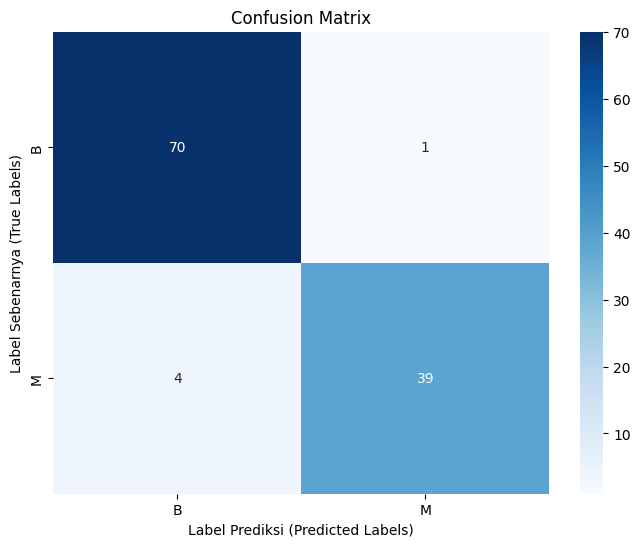

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya (True Labels)')
plt.xlabel('Label Prediksi (Predicted Labels)')
plt.show()

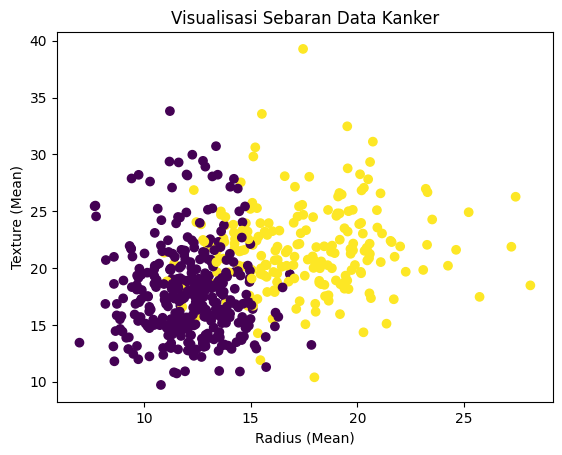

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_cleaned['radius_mean'], df_cleaned['texture_mean'], c=df_cleaned['diagnosis'].astype('category').cat.codes)
plt.xlabel('Radius (Mean)')
plt.ylabel('Texture (Mean)')
plt.title('Visualisasi Sebaran Data Kanker')
plt.show()

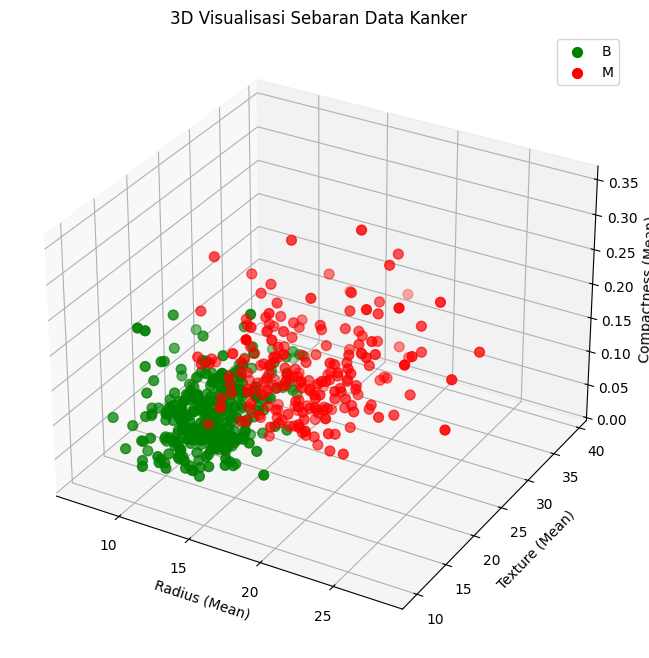

In [ ]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 1. Encode label (ubah 'B' dan 'M' jadi 0 dan 1)
# Kita pakai df_cleaned
le = LabelEncoder()
df_cleaned['diagnosis_encoded'] = le.fit_transform(df_cleaned['diagnosis'])

# 2. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3. Warna untuk tiap kelas (hanya 2: 'B' dan 'M')
# Mari kita set: 'B' (Benign) = 'g' (Green), 'M' (Malignant) = 'r' (Red)
colors = ['g', 'r']
labels = le.classes_ # Ini akan berisi ['B', 'M']

# 4. Plot tiap kelas dengan warna berbeda
for i, diagnosis_label in enumerate(labels):
    # Ambil data yang 'diagnosis_encoded'-nya == i (0 atau 1)
    subset = df_cleaned[df_cleaned['diagnosis_encoded'] == i]

    # Ganti sumbu X, Y, Z dengan fitur dari data kanker
    ax.scatter(
        subset['radius_mean'],     # Sumbu X
        subset['texture_mean'],    # Sumbu Y
        subset['compactness_mean'],# Sumbu Z
        color=colors[i],
        label=diagnosis_label,
        s=50
    )

# 5. Set label dan judul baru
ax.set_xlabel('Radius (Mean)')
ax.set_ylabel('Texture (Mean)')
ax.set_zlabel('Compactness (Mean)')
ax.set_title('3D Visualisasi Sebaran Data Kanker')
ax.legend()
plt.show()